In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from DataPreparing import Preparer
from Aglomerative.GeoSolver import GeoSolver
from KMeans import *
from DataPipeline import DataPipeline
from DataResearch import Scorer

In [10]:
all_time = pd.read_csv("data/all_time_template.csv")
arg1 = all_time.drop("ID Лота", axis=1)
arg2 = all_time["ID Лота"]
arg2.info()
human_lots=all_time["ID Лота"]


<class 'pandas.core.series.Series'>
RangeIndex: 39530 entries, 0 to 39529
Series name: ID Лота
Non-Null Count  Dtype  
--------------  -----  
30463 non-null  float64
dtypes: float64(1)
memory usage: 309.0 KB


In [20]:
# datapipe = DataPipeline()
# print(datapipe.put_requests(arg1))

In [3]:
req_fea = pd.read_csv("data/requests_features.csv")

C:\Users\lamin\AppData\Local\Temp\ipykernel_19240\735448713.py:1: DtypeWarning: Columns (19,25) have mixed types. Specify dtype option on import or set low_memory=False.
  req_fea = pd.read_csv("data/requests_features.csv")


In [4]:
req_fea.dropna(subset=["human_lot_id"], inplace=True)
req_fea["human_lot_id"] = req_fea["human_lot_id"].astype('int64')
req_fea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7864023 entries, 0 to 9939989
Data columns (total 28 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   human_lot_id                            int64  
 1   request_id                              int64  
 2   order_dt                                object 
 3   delivery_dt                             object 
 4   receiver_id                             int64  
 5   receiver_address_id                     int64  
 6   receiver_address                        object 
 7   receiver_address_latitude               float64
 8   receiver_address_longitude              float64
 9   receiver_address_coords_geo_confidence  float64
 10  class_id                                int64  
 11  class_name                              object 
 12  standard_shipping                       int64  
 13  material_id                             int64  
 14  material_name                     

In [6]:
ht = req_fea[["request_id", "human_lot_id"]]
human_lots = ht.drop_duplicates(subset=["request_id"])
human_lots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30284 entries, 0 to 9939806
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   request_id    30284 non-null  int64
 1   human_lot_id  30284 non-null  int64
dtypes: int64(2)
memory usage: 709.8 KB


In [8]:
X_train = req_fea.copy()

X_train.rename(columns={"receiver_address_latitude": "reciever_lat",
                        "receiver_address_longitude": "reciever_long"}, inplace=True)

clf = KMeansOnlyRecvV1(18, 42)
pred = clf.fit_predict(X_train)

X_train["lot_id"] = pred
# print(X_train.sample(n=5))
# X_train.to_csv("data/KMeans_result_for_1month_only_recievers.csv", index=False)

         human_lot_id  request_id                    order_dt  \
9035513  100000762639       36183  2023-11-01 00:00:00.000000   
296800   100000338295        1033  2020-02-17 00:00:00.000000   
63216    100000317656         214  2020-01-15 00:00:00.000000   
8402140  100000762679       33809  2023-08-23 00:00:00.000000   
9384991  100000763249       37450  2023-12-20 00:00:00.000000   

                        delivery_dt  receiver_id  receiver_address_id  \
9035513  2024-06-30 00:00:00.000000     20000222                   39   
296800   2020-07-18 00:00:00.000000     20001123                  162   
63216    2020-05-16 00:00:00.000000     20000974                  142   
8402140  2024-06-30 00:00:00.000000     20002999                 1552   
9384991  2024-04-18 00:00:00.000000     20000511                   79   

                                          receiver_address  reciever_lat  \
9035513  629805, РФ, ЯНАО, г. Ноябрьск, промзона, панел...     63.166700   
296800   629320, Р

In [11]:
lts = X_train[["request_id", "lot_id"]]
lts["lot_id"] = lts["lot_id"].astype('int64') 
lots = lts.drop_duplicates(subset=["request_id"])
lots.info()

C:\Users\lamin\AppData\Local\Temp\ipykernel_19240\2537087498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lts["lot_id"] = lts["lot_id"].astype('int64')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30284 entries, 0 to 9939806
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   request_id  30284 non-null  int64
 1   lot_id      30284 non-null  int64
dtypes: int64(2)
memory usage: 709.8 KB


In [ ]:
lts["lot_id"]

In [63]:
shuman = pd.read_csv("data/sample_human_lots.csv")
slots = pd.read_csv("data/sample_lots.csv")
sreq_fea = pd.read_csv("data/sample_requests_features.csv")
shuman.info()
slots.info()
sreq_fea.info()
scorer = Scorer()
print(scorer.mq_score(sreq_fea, slots, shuman))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   request_id    880 non-null    int64
 1   human_lot_id  880 non-null    int64
dtypes: int64(2)
memory usage: 13.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   request_id  880 non-null    int64
 1   lot_id      880 non-null    int64
dtypes: int64(2)
memory usage: 13.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250850 entries, 0 to 250849
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   request_id                              250850 non-null  int64  
 1   order_dt                                250850 non-null  object 
 2 

In [19]:
requests = req_fea.drop_duplicates(subset=["request_id"])
requests = requests.drop("human_lot_id", axis=1)
requests.info()
lots.info()
human_lots.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 30284 entries, 0 to 9939806
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   request_id                              30284 non-null  int64  
 1   order_dt                                30284 non-null  object 
 2   delivery_dt                             30284 non-null  object 
 3   receiver_id                             30284 non-null  int64  
 4   receiver_address_id                     30284 non-null  int64  
 5   receiver_address                        30284 non-null  object 
 6   reciever_lat                            30284 non-null  float64
 7   reciever_long                           30284 non-null  float64
 8   receiver_address_coords_geo_confidence  30284 non-null  float64
 9   class_id                                30284 non-null  int64  
 10  class_name                              30284 non-null  

In [21]:
merged = pd.merge(requests, human_lots, on='request_id').groupby('human_lot_id')['item_cost'].sum().mean()
# merged.info()
merged

11442891.382653467

In [24]:
scorer = Scorer()
print(scorer.mq_score(requests, lots, human_lots))
print(scorer.ms_score(requests, lots))

0.9956479690522244
0.05925925925925926


[2 2 2 ... 3 3 3]
[3 3 3 ... 2 2 2]
[3 3 3 ... 4 4 4]
[4 4 4 ... 7 7 7]
[7 7 7 ... 8 8 8]
[7 7 7 ... 9 9 9]
[9 9 9 ... 0 0 0]
[9 9 9 ... 4 4 4]
[1 1 1 ... 2 2 2]
[9 9 9 ... 2 2 2]
[8 8 8 ... 3 3 3]
[11 11 11 ...  4  4  4]
[9 9 9 ... 3 3 3]
[8 8 8 ... 4 4 4]
[10 10 10 ...  8  8  8]
[12 12 12 ...  4  4  4]
[5 5 5 ... 3 3 3]
[10 10 10 ...  4  4  4]
[ 8  8  8 ... 11 11 11]
[8 8 8 ... 7 7 7]


ValueError: x and y must have same first dimension, but have shapes (14,) and (20,)

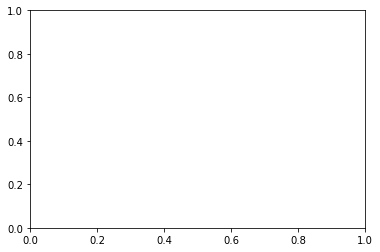

In [32]:
to_fit1 = X_train[["reciever_lat", "reciever_long"]]

score = []
for i in range(6, 26):
    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('clust', KMeans(i, random_state=42, n_init=10)),
            ]).fit(to_fit1)

    label_pred = pipe.predict(to_fit1)
    score.append(pipe[1].inertia_)
    print(label_pred)
plt.plot(np.arange(6,26), score)

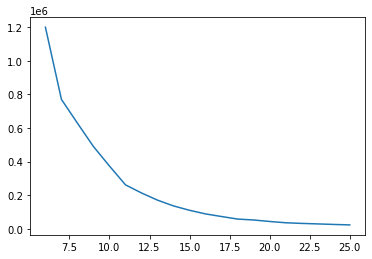

In [33]:
plt.plot(np.arange(6,26), score)